# **Case Study - Challenger Launch**

Space shuttle missions evolved after tragic events like Challenger and Columbia disasters. To enhance safety, space agencies embraced proactive measures, including comprehensive data analysis. Recognizing the importance of statistics, statisticians became integral to mission teams, analyzing past data, weather, and technical details. This thorough analysis identifies risks, predicts outcomes, and enhances safety decisions, ensuring successful space exploration. As a dedicated data analyst, I'll explore post-Challenger developments, showcasing the pivotal role of data in shaping safer space practices.

On January 28, 1986, the Challenger shuttle tragically disintegrated 73 seconds after liftoff, leading to the loss of all seven astronauts.
The Challenger disaster revealed a critical issue: the failure of vital O-ring joints in the Space Shuttle's boosters. O-rings seal joints, preventing hot gases from escaping. There rae 5 such O rings and interestingly all five O-rings need to fail simultaneously for a disaster, Adding to the significance, in extremely cold conditions, the O-rings can lose their elasticity, a crucial property essential for withstanding launch stress and maintaining a tight seal. In the Challenger incident, the failure of these O-rings caused the hot gases to escape, leading to the shuttle's destruction just 73 seconds after liftoff

Before the Challenger disaster, NASA had successfully conducted 24 Space Shuttle launches.
Examining data from the previous 24 launches, we aim to analyze the O-Ring performance. This analysis seeks to understand if the Challenger tragedy could have been averted with robust data analysis. By pinpointing where engineers might have faltered, we delve into the question of what went wrong.

### **Importing the necessary libraries**

In [2]:
# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the data**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/MIT - Python/challenger-data.csv')

**Now let us see the top five records of the rating data.**

In [37]:
data.head()

,Observation,Y,X
0,1,1,53
1,2,1,53
2,3,1,53
3,4,0,53
4,5,0,53


- X represent the temperature while the time of launch of the Rocket.
- Y represents the whether an o-rings failure happened or not at the temperature.
- 0 depicts O-ring failure and 1 depicts O-ring success.

In [5]:
data["Y"].count()#To check the number of data points.

120

Let's check the **info** of the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Observation  120 non-null    int64
 1   Y            120 non-null    int64
 2   X            120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


- The data is comprised of 120 non-null values.

Before the Challenger disaster, there were 24 launches, and for each launch, data on the success or failure of all 5 O-rings was recorded. This provides a total of 120 observations, one for each O-ring during each launch.

In [7]:
#Count the observations for each temperature at which launches occurred.
data["X"].value_counts()

70    20
67    15
76    10
75    10
72     5
80     5
79     5
78     5
73     5
53     5
57     5
69     5
68     5
66     5
63     5
58     5
81     5
Name: X, dtype: int64

Observations:
- 20 O-rings data recorded at 70°F
- 15 O-rings data recorded at 67°F
- 10 O-rings data recorded at 76°F
- 10 O-rings data recorded at 75°F, and so on.

The Challenger disaster happened because all of the 5 O-rings in the field joints failed allowing the hot gases to escape, which led to the Space Shuttle's fuel tank breaking apart and the whole shuttle being destroyed in just 73 seconds after it took off.

###Lets see the number of launches happened at each temperature.

In [8]:
#getting the number of launches at each temperature
ff = (data["X"].value_counts()/5).reset_index(name = "NUMBER_OF_LAUNCHES")
ff["NUMBER_OF_LAUNCHES"]=ff["NUMBER_OF_LAUNCHES"].astype("int")
ff.rename(columns = {'index':'Temperature at launch (Fahrenheit)'}, inplace = True)
ff = ff.set_index('Temperature at launch (Fahrenheit)')
ff.loc[:,["NUMBER_OF_LAUNCHES"]].sort_values("Temperature at launch (Fahrenheit)")

,NUMBER_OF_LAUNCHES
Temperature at launch (Fahrenheit),
53,1
57,1
58,1
63,1
66,1
67,3
68,1
69,1
70,4


Observations-
- The table above displays the count of launches at different temperatures. For instance, there were 4 launches at 75°F, 1 at 53°F, and 3 at 63°F, among others.

In [9]:
data.describe()

,Observation,Y,X
count,120.000000,120.000000,120.000000
mean,60.500000,0.083333,70.000000
std,34.785054,0.277544,7.100716
min,1.000000,0.000000,53.000000
25%,30.750000,0.000000,67.000000
50%,60.500000,0.000000,70.000000
75%,90.250000,0.000000,75.250000
max,120.000000,1.000000,81.000000


- The average temperature at which launch usually happens is 70 fahrenheit.

#**What data NASA reviewed.**

On the ill-fated day, the temperature was an unusually low 36°F, prompting concerns from engineers regarding the O-rings' reliability at low temperatures and the launch's safety. Despite these worries, NASA, lacking a statistician on the team, examined temperatures during launches with O-ring failures. Out of the 24 launches, 6 instances occurred where at least one O-ring disintegrated.

In [36]:
df = data.groupby(["X","Y"])["Y"].count().reset_index(name="count")#getting number of failures and number of success of O rings, for each temperature at which launch happened.
#print(df) #Get the output of this to understand the distribution of data over all the temperatures.
fails = (df.loc[(df["Y"] == 1) & (df["count"] >= 1)].reset_index())
fails.drop(["index"],axis=1,inplace=True)
fails["No. of O-ring failed"] = (fails["count"])
#print(fails)
fails["No. of O-ring failed"]=fails["No. of O-ring failed"].astype("int")#Launches with atleast 1 O-ring failure.
fails = fails.set_index('X')
fails.loc[:,["No. of O-ring failed"]]

,No. of O-ring failed
X,
53,3
57,1
58,1
63,1
70,2
75,2


Observations:-
- At 53F 3 O-rings failed.
- At 57F, 58F, 63F, 1 O-ring failed at each launch.
- At temperature 70 and 75F, 2 rings failed.

 Effectively, the scatter plot looks like this.

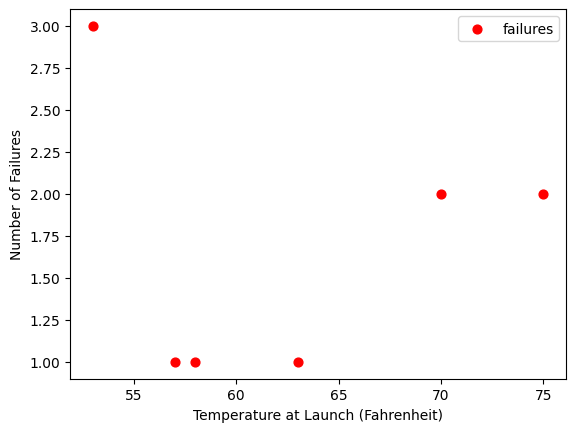

In [17]:
# We will be using the Matplotlib library for plotting.

# subsetting the data
failures = data.loc[(data.Y == 1)]

# frequencies
failures_freq = failures['X'].value_counts() #failures.groupby('X')

# plotting
import matplotlib as mpl
from matplotlib	import pyplot as plt
plt.scatter(failures_freq.index, failures_freq, c='red', s=40)
plt.xlabel('Temperature at Launch (Fahrenheit)')
plt.ylabel('Number of Failures')
plt.legend(['failures', 'No failures'])
plt.show()

The scatter plot illustrates temperatures during launch and the corresponding O-ring failures, focusing on the six launches with failures. Notably, failures occurred at both low and high temperatures, indicating no clear temperature-related pattern. Despite concerns, NASA proceeded based on previous failures at various temperatures. Tragically, the Challenger disaster ensued, revealing the failure of all five O-rings as the cause. The crucial question arises: Could the disaster have been prevented? Was there enough evidence for engineers to convince NASA managers about the O-rings' vulnerability at low temperatures?

#**Where they went wrong?**

The earlier plot of O-ring failures implies a lack of strong correlation between temperature and failures. Yet, this analysis disregards vital data from 18 launches where no O-ring failures occurred. Details are provided in the table below.

In [33]:
#all the launches where no O ring failure happened.

no_fails = (df.loc[(df["Y"] == 0) & (df["count"] >= 5)].reset_index())
no_fails.drop(["index"],axis=1,inplace=True)
#print(no_fails)
no_fails["NUMBER OF LAUNCH WITH NO O RING FAILURES"] = (no_fails["count"] / 5)

no_fails["NUMBER OF LAUNCH WITH NO O RING FAILURES"]=no_fails["NUMBER OF LAUNCH WITH NO O RING FAILURES"].astype("int")#successfull launch with no O-Rings failures.
no_fails = no_fails.set_index('X')
no_fails.loc[:,["NUMBER OF LAUNCH WITH NO O RING FAILURES"]]

,NUMBER OF LAUNCH WITH NO O RING FAILURES
X,
66,1
67,3
68,1
69,1
70,3
72,1
73,1
75,1
76,2


### **Visualizing	the	Data**

And the complete plot looks like this:-

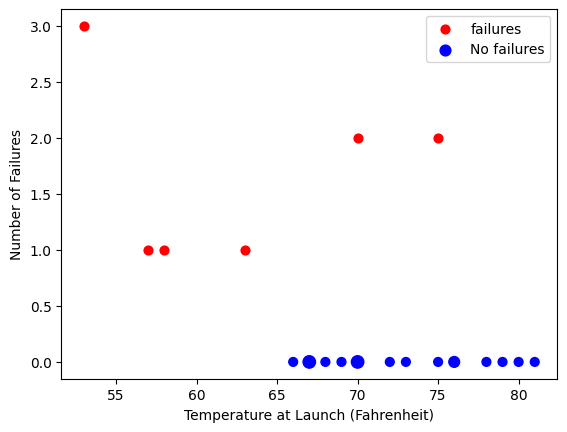

In [13]:
# We will be using the Matplotlib library for plotting.

# subsetting the data
failures = data.loc[(data.Y == 1)]

# frequencies
failures_freq = failures['X'].value_counts() #failures.groupby('X')

# plotting
import matplotlib as mpl
from matplotlib	import pyplot as plt
plt.scatter(failures_freq.index, failures_freq, c='red', s=40)
plt.scatter(no_fails.index, np.zeros(len(no_fails)), c='blue', s=(20 + 20*(no_fails["launch"])))
plt.xlabel('Temperature at Launch (Fahrenheit)')
plt.ylabel('Number of Failures')
plt.legend(['failures', 'No failures'])
plt.show()

The visual narrative of the graph is striking: blue markers indicate successful launches without O-ring failures, while red marks failures. Larger blue dots represent multiple successful missions, altering the data landscape significantly. A clear trend emerges upon examination: failures cluster at lower temperatures on the left, while successful launches concentrate at higher temperatures. All failure-free flights occurred at temperatures above 65°F, while incidents happened below that threshold. This highlights a distinct relationship between temperature and O-ring failure. Notably, Saucerful launches averaged at 70°F for failure-free missions, markedly higher than the actual temperature during the Challenger launch at 36°F, the coldest ever recorded.

#**How could the disaster have been prevented?**

### **Logistic Regression**


Sadly, the absence of this analysis caused decision-makers to miss vital insights. Even a basic tool like logistic regression could have predicted launch failure odds based on temperature. This understanding could have significantly influenced NASA's decision on the January 28th launch, emphasizing the crucial link between low temperatures and O-ring vulnerability, providing strong grounds for postponement.

In [14]:
# You will need to have the following libraries installed before proceeding:
import statsmodels.formula.api as SM

# Build the model
model = SM.logit(formula='Y~X',data=data)
result = model.fit()

# Summarize the model
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                  0.1549
Time:                        14:53:45   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.

- We now have the model and the summaries should provide the coefficient, intercept, standard errors and p-values.
- The Negative coefficient for X determines if the the temperate lowers by 1 there is ~15% chance for o-ring failure.
- p have for both intercept and X signifies that they are statistically significant and temperature does effect the change of an o-ring failure.

##**Aftermath**

Following the tragedy, including a statistician in the control team became a key recommendation, underscoring the role of data analysis in informed decision-making. This emphasis on data-driven approaches has become integral to global space research, enabling successful exploration and revealing hidden truths in the universe

##**Wrap Up Note-**

This case study, undertaken during my machine learning course, illuminated the profound impact of data-driven decision-making, a lesson starkly illustrated by the Challenger incident. It stands as a poignant reminder of the pivotal role data holds in shaping our choices, especially in critical situations. Intrigued by its relevance, I delved deeper and penned an article, emphasizing the indispensable nature of data in guiding our decisions. This incident underscores the vital importance of embracing data-based insights, ensuring informed and responsible decision-making in today's complex world. You can explore the detailed insights in the article I wrote on this topic here.[Read](https://www.linkedin.com/pulse/challenger-tragedy-chandrayaan-3-triumph-data-driven-srivastava%3FtrackingId=axIbOxRnQ3itiv4qUA%252Fb%252Bw%253D%253D/?trackingId=axIbOxRnQ3itiv4qUA%2Fb%2Bw%3D%3D)